## Diplomado en Ciencia de Datos 3ra edición

### Docente:
*Renzo Claure Aracena*

### Objetivo:
- Extraer información valiosa de una base de datos, a través de la implementación de un notebok de Python y utilizando técnicas de visualización y estadísticas descriptivas e inferenciales

### Instrucciones
- Conseguir una base de datos, explicar su contexto y objetivo.
- Describir sus principales características (tipo de variables, cnatidad de datos y variables).
- Describir las variables (estadísticos descriptivos según el tipo)
- Elaborar 3 gráficos y explicarlos
- ... se darán más explicaciones las siguientes clases


### Sobre el archivo a entregar:
El Notebook final debe almacenarse con el siguiente formato para el nombre de archivo:  
  **nombre_apellido_20025_3.ipynb**  

## **Diplomado en Ciencia de Datos 3ra edición**

### Docente:
*Renzo Claure Aracena*

### Datos del alumno:
Brian Miguel Herrera Vasquez  
herrera.riam@gmail.com

### 1. Descripcion de la base de datos

**OBJETIVO:** Este dataset proporciona una visión general del mercado de **criptomonedas** en 2024, recopilando datos de más de 10,000 activos mediante web scraping de [CoinMarketCap](https://coinmarketcap.com/). Incluye métricas clave como precio, variaciones porcentuales, capitalización de mercado, volumen de negociación y oferta total, permitiendo el análisis de tendencias y comportamiento del mercado.

AUTOR: Menciona q fue obtenida utilizando datos públicos de  a través de web scraping.

---

**CANTIDAD DE REGISTROS Y VARIABLES:** Más de 10,000 criptomonedas y 17 columnas.

**Tipos de Variables**
1.   **Variables Cualitativas (Categoricas)**
  *   **Name:** Nombre de la criptomoneda.
  *   **Symbol:** Simbolo o ticker de la criptomoneda.

2.   **Variables Cuantitativas**
  * **Variables Cuantitativas Continuas:**
      * **Price:** Precio actual de la criptomoneda. en USD.
      * **1h %:** Cambio porcentual del precio en la última 1 hora.
      * **24h %:** Cambio porcentual del precio en las últimas 24 horas.
      * **7d %:** Cambio porcentual del precio en los últimos 7 días.
      * **60d %:** Cambio porcentual del precio en los últimos 60 días.
      * **90d %:** Cambio porcentual del precio en los últimos 90 días.
      * **YTD %:** Cambio porcentual del precio en el año en curso.
      * **Market Cap:** Capitalización de mercado total de la criptomoneda.
      * **Volume (24h):** Volumen de negociación en las últimas 24 horas.
      * **Volume Change (24h):** Cambio porcentual del volumen de negociación en las últimas 24 horas.
      * **Volume Change (30d):** Cambio porcentual del volumen de negociación en los últimos 30 días.
  * **Variables Cuantitativas Discretas:**
      * **Circulating Supply:** Cantidad de monedas en circulación.
      * **Total Supply:** Suministro total de la criptomoneda.
      * **Max Supply:** Máximo suministro posible de la criptomoneda.
      * **Num Market Pairs:** Cantidad de pares de mercado en los que se negocia la criptomoneda.
---

**FUENTE:** La base de Datos fue obtenida de la plataforma Kaggle:
*   [https://www.kaggle.com/datasets/vedaantsingh/
comprehensive-cryptocurrency-market-data/data](https://www.kaggle.com/datasets/vedaantsingh/comprehensive-cryptocurrency-market-data/data)

---

### 2. Importar los datos al Notebook


```
#En esta sección debe estar el codigo de la importación, la verificacion de calidad de la importación y una visualización de algunos casos.
```



In [30]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import scipy.stats as stats

In [31]:
#Importacion

# Acceso a drive
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Colab Notebooks/Diplomado/MODULO-1/Trabajo_Final/crypto_trends_insights_2024.csv'

# Acceso
crypto_data = pd.read_csv(path)
#crypto_data = pd.read_csv('crypto_trends_insights_2024.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Verificacion
crypto_data.shape

(10422, 17)

In [33]:
# Visualizacion
crypto_data.head()

,Name,Symbol,Price,1h %,24h %,7d %,60d %,90d %,YTD %,Market Cap,Volume (24h),Volume Change (24h),Volume Change (30d),Circulating Supply,Total Supply,Max Supply,Num Market Pairs
0,Bitcoin,BTC,96183.612709,-0.582452,-1.406937,-6.098029,43.357862,50.760758,NaN,1.904383e+12,5.128441e+10,-46.4837,NaN,1.979945e+07,1.979945e+07,2.100000e+07,11849
1,Ethereum,ETH,3313.788191,-0.906492,-4.726532,-14.958048,26.799836,24.709903,NaN,3.991634e+11,3.126633e+10,-48.6213,NaN,1.204553e+08,1.204553e+08,NaN,9712
2,Tether USDt,USDT,0.999253,-0.020326,-0.027455,-0.035466,-0.002103,-0.076709,NaN,1.397684e+11,1.421387e+11,-41.9306,NaN,1.398728e+11,1.434401e+11,NaN,109588
3,XRP,XRP,2.188454,-2.185932,-5.350521,-10.121365,312.945320,270.081243,NaN,1.252942e+11,1.424509e+10,-45.1770,NaN,5.725238e+10,9.998681e+10,1.000000e+11,1485
4,BNB,BNB,651.685277,-1.337123,-5.012758,-8.951213,10.758367,9.719003,NaN,9.384770e+10,2.075789e+09,-31.4686,NaN,1.440077e+08,1.440077e+08,NaN,2315


In [34]:
# Visualizacion
crypto_data.tail()

,Name,Symbol,Price,1h %,24h %,7d %,60d %,90d %,YTD %,Market Cap,Volume (24h),Volume Change (24h),Volume Change (30d),Circulating Supply,Total Supply,Max Supply,Num Market Pairs
10417,Stride Staked SOMM,stSOMM,0.015834,0.000000,-19.017825,-35.574243,-7.455175,-48.336046,NaN,16559.907764,544.159754,69.8855,NaN,1.045871e+06,1.045871e+06,NaN,1
10418,Stride Staked UMEE,stUMEE,0.001139,0.000000,-2.990862,-23.316099,1.982217,5.067630,NaN,15467.541592,10.696870,-3.9371,NaN,1.357555e+07,1.357555e+07,NaN,1
10419,Wrapped Staked HEC,WSHEC,0.749987,-0.405587,-7.882278,-27.581744,-17.750543,-32.208559,NaN,14595.106308,36.288848,-73.5432,NaN,1.946047e+04,1.946047e+04,NaN,10
10420,Staked NEAR,STNEAR,6.572521,-1.810748,-11.156100,-26.772605,6.533518,10.799130,NaN,0.000000,179674.507801,-33.5706,NaN,0.000000e+00,0.000000e+00,NaN,30
10421,Merlin Chain (M-BTC),M-BTC,96044.230757,-0.698077,-1.075594,-9.536139,-9.536139,-9.536139,NaN,0.000000,7324.675767,-92.5568,NaN,0.000000e+00,1.886500e+04,21000000.0,3


### 3. Tratamiento de variables


```
#En esta sección debe revisar los tipos de variables, identificar si existen valores nulos y su tratamiento de ser necesario.
#Si realiza un tratamiento de datos perdidos, justifique su decisión.
```



In [35]:
# Revision Tipos de Variable
crypto_data.dtypes

,0
Name,object
Symbol,object
Price,float64
1h %,float64
24h %,float64
7d %,float64
60d %,float64
90d %,float64
YTD %,float64
Market Cap,float64


#### *Identificar datos perdidos*

In [36]:
# Detectar valores faltantes
crypto_data.isnull()

,Name,Symbol,Price,1h %,24h %,7d %,60d %,90d %,YTD %,Market Cap,Volume (24h),Volume Change (24h),Volume Change (30d),Circulating Supply,Total Supply,Max Supply,Num Market Pairs
0,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
10418,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
10419,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
10420,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False


In [37]:
# Contar la cantidad  de valores faltantes en cada columna
crypto_data.isnull().sum()

,0
Name,0
Symbol,0
Price,0
1h %,0
24h %,0
7d %,0
60d %,0
90d %,0
YTD %,10422
Market Cap,0


<Axes: >

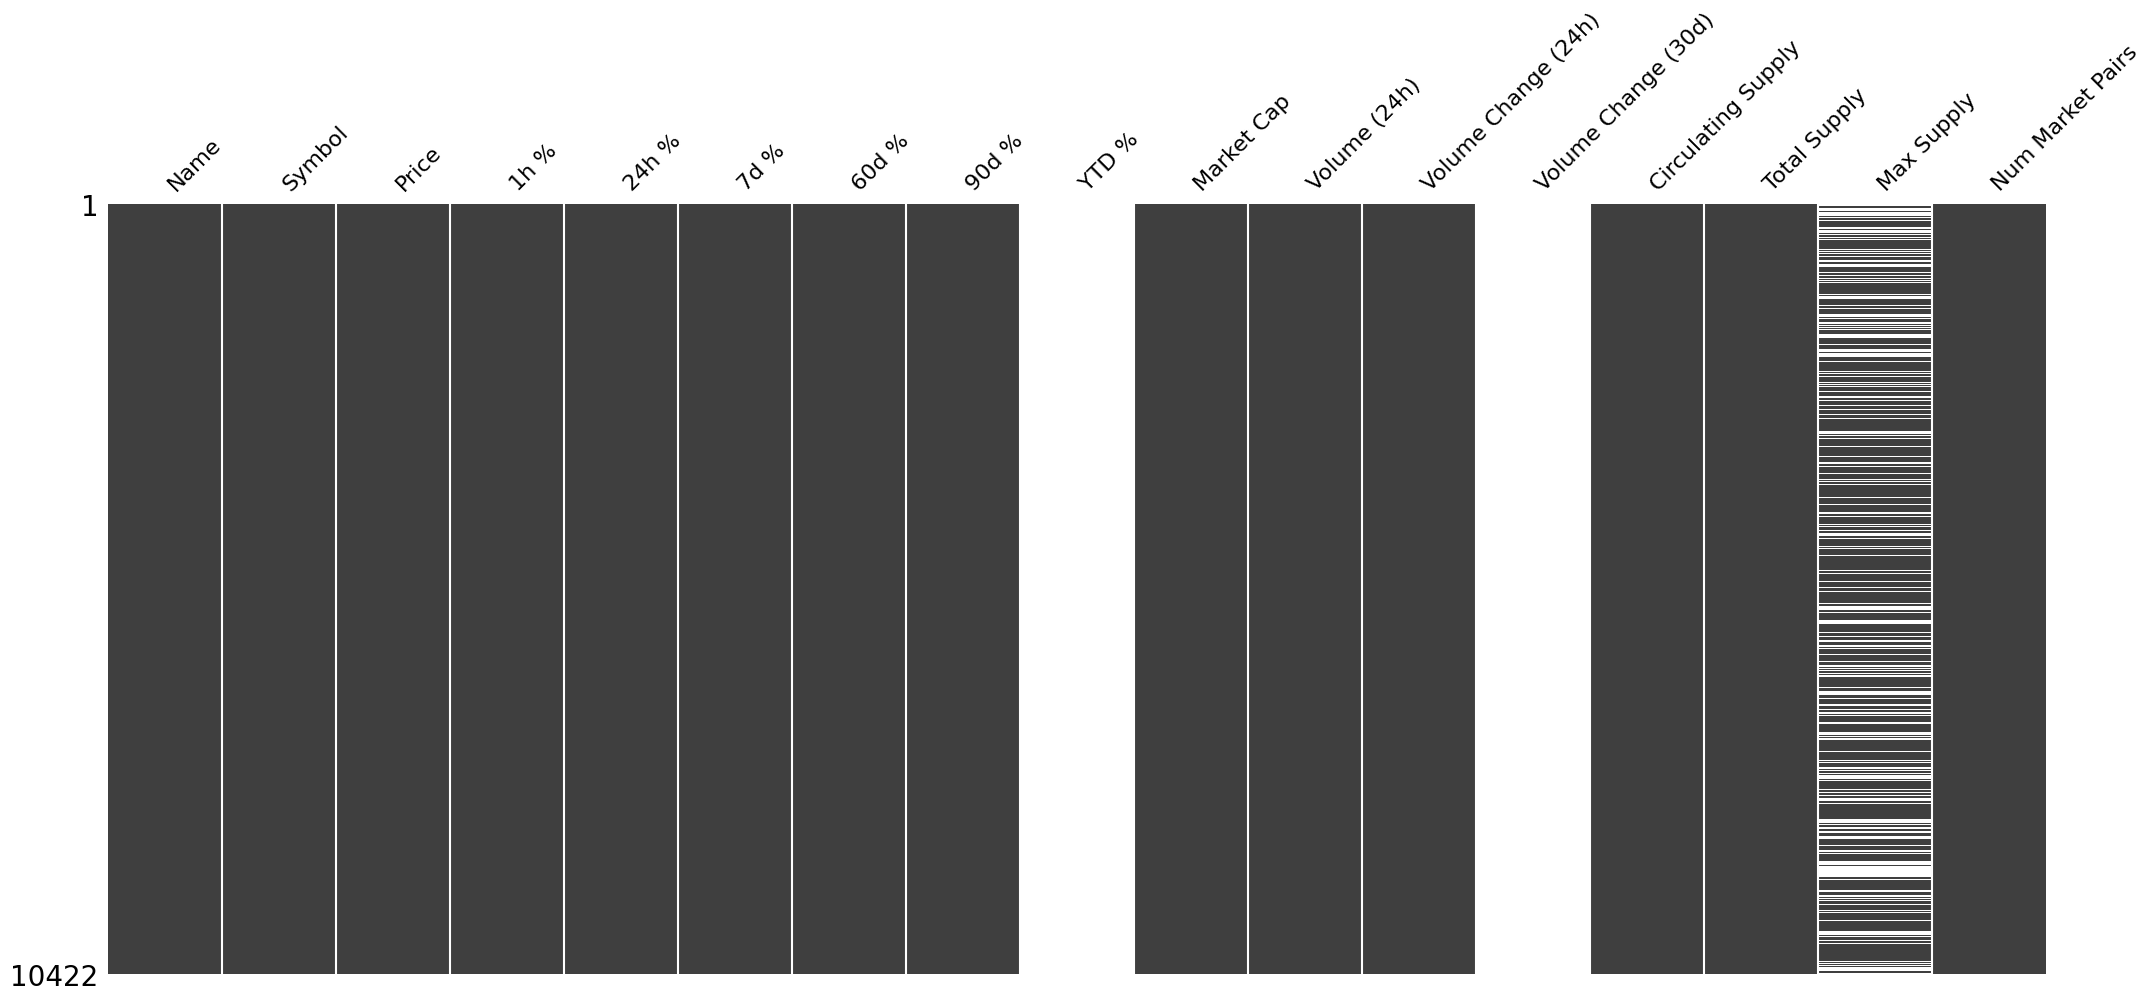

In [38]:
# Visualizacion Grafica de valores nulos de cada columna
msno.matrix(crypto_data, sparkline=False)

In [39]:
# Visualizacion de las filas donde la columna 'Max Supply' tenga valores perdidos (NaN)
missing_max_supply = crypto_data[crypto_data['Max Supply'].isna()]

missing_max_supply

,Name,Symbol,Price,1h %,24h %,7d %,60d %,90d %,YTD %,Market Cap,Volume (24h),Volume Change (24h),Volume Change (30d),Circulating Supply,Total Supply,Max Supply,Num Market Pairs
1,Ethereum,ETH,3313.788191,-0.906492,-4.726532,-14.958048,26.799836,24.709903,NaN,3.991634e+11,3.126633e+10,-48.6213,NaN,1.204553e+08,1.204553e+08,NaN,9712
2,Tether USDt,USDT,0.999253,-0.020326,-0.027455,-0.035466,-0.002103,-0.076709,NaN,1.397684e+11,1.421387e+11,-41.9306,NaN,1.398728e+11,1.434401e+11,NaN,109588
4,BNB,BNB,651.685277,-1.337123,-5.012758,-8.951213,10.758367,9.719003,NaN,9.384770e+10,2.075789e+09,-31.4686,NaN,1.440077e+08,1.440077e+08,NaN,2315
5,Solana,SOL,179.372281,-1.716456,-8.890221,-18.768562,8.751816,22.598669,NaN,8.598282e+10,5.545510e+09,-39.5112,NaN,4.793540e+08,5.906521e+08,NaN,813
6,Dogecoin,DOGE,0.306816,-3.031265,-7.156223,-23.155976,121.967464,184.934321,NaN,4.519455e+10,6.590880e+09,-41.2696,NaN,1.473018e+11,1.473018e+11,NaN,1130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10416,Wrapped PKT,WPKT,0.000322,0.000000,-4.727250,-25.474307,-43.739627,-33.951041,NaN,2.011425e+04,1.352599e+01,2615.6190,NaN,6.247945e+07,6.247945e+07,NaN,21
10417,Stride Staked SOMM,stSOMM,0.015834,0.000000,-19.017825,-35.574243,-7.455175,-48.336046,NaN,1.655991e+04,5.441598e+02,69.8855,NaN,1.045871e+06,1.045871e+06,NaN,1
10418,Stride Staked UMEE,stUMEE,0.001139,0.000000,-2.990862,-23.316099,1.982217,5.067630,NaN,1.546754e+04,1.069687e+01,-3.9371,NaN,1.357555e+07,1.357555e+07,NaN,1
10419,Wrapped Staked HEC,WSHEC,0.749987,-0.405587,-7.882278,-27.581744,-17.750543,-32.208559,NaN,1.459511e+04,3.628885e+01,-73.5432,NaN,1.946047e+04,1.946047e+04,NaN,10


In [40]:
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 10422 non-null  object 
 1   Symbol               10422 non-null  object 
 2   Price                10422 non-null  float64
 3   1h %                 10422 non-null  float64
 4   24h %                10422 non-null  float64
 5   7d %                 10422 non-null  float64
 6   60d %                10422 non-null  float64
 7   90d %                10422 non-null  float64
 8   YTD %                0 non-null      float64
 9   Market Cap           10422 non-null  float64
 10  Volume (24h)         10422 non-null  float64
 11  Volume Change (24h)  10422 non-null  float64
 12  Volume Change (30d)  0 non-null      float64
 13  Circulating Supply   10422 non-null  float64
 14  Total Supply         10422 non-null  float64
 15  Max Supply           7193 non-null  

#### TRATAMIENTO - *Eliminar Datos Perdidos*

In [41]:
# Elminacion de Columnas['YTD %'], ['Volume Change (30d)']
# Razon = Valores ausentes 10.422 filas de cada columna
crypto_data.drop(columns=['YTD %', 'Volume Change (30d)'], inplace = True)

In [42]:
# Identificacion de precio = 0 de criptomonedas
indexs = crypto_data[crypto_data["Price"] == 0].index.tolist()
print("Índices de filas con 0:", indexs)
crypto_data.iloc[8681]

Índices de filas con 0: [8681]


,8681
Name,ELON’S CAT
Symbol,CATME
Price,0.0
1h %,0.0
24h %,0.0
7d %,0.0
60d %,0.0
90d %,0.0
Market Cap,0.0
Volume (24h),1.983509


In [43]:
# Eliminacion de fila con el precio = 0

crypto_data.drop(index=8681, inplace=True)

# Razon-1: IMPOSIBLE Tecnicamente el valor de una criptomoneda Precio = 0
# Razon-2: registran 0 USD temporalmente por fallas técnicas.
# Razon-3: probable que haya quebrado o desaparecido
# Razon-4: distorsionar estadísticas como media y mediana.


#### TRATAMIENTO - *Transformar Datos Perdidos*

In [44]:
# Tratamiento de la Columna [Max Supply] aplicar IQR por tener el 30% de datos faltantes
def impute_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Reemplazar valores NaN con la mediana dentro del rango IQR
    median_iqr = column[(column >= lower_bound) & (column <= upper_bound)].median()
    column.fillna(median_iqr, inplace=True)
    return column

crypto_data['Max Supply'] = impute_iqr(crypto_data['Max Supply'])

In [45]:
crypto_data.head()

,Name,Symbol,Price,1h %,24h %,7d %,60d %,90d %,Market Cap,Volume (24h),Volume Change (24h),Circulating Supply,Total Supply,Max Supply,Num Market Pairs
0,Bitcoin,BTC,96183.612709,-0.582452,-1.406937,-6.098029,43.357862,50.760758,1.904383e+12,5.128441e+10,-46.4837,1.979945e+07,1.979945e+07,2.100000e+07,11849
1,Ethereum,ETH,3313.788191,-0.906492,-4.726532,-14.958048,26.799836,24.709903,3.991634e+11,3.126633e+10,-48.6213,1.204553e+08,1.204553e+08,9.553554e+08,9712
2,Tether USDt,USDT,0.999253,-0.020326,-0.027455,-0.035466,-0.002103,-0.076709,1.397684e+11,1.421387e+11,-41.9306,1.398728e+11,1.434401e+11,9.553554e+08,109588
3,XRP,XRP,2.188454,-2.185932,-5.350521,-10.121365,312.945320,270.081243,1.252942e+11,1.424509e+10,-45.1770,5.725238e+10,9.998681e+10,1.000000e+11,1485
4,BNB,BNB,651.685277,-1.337123,-5.012758,-8.951213,10.758367,9.719003,9.384770e+10,2.075789e+09,-31.4686,1.440077e+08,1.440077e+08,9.553554e+08,2315


In [46]:
#Revision existencia de valores nulos por columna
crypto_data.isnull().sum()

,0
Name,0
Symbol,0
Price,0
1h %,0
24h %,0
7d %,0
60d %,0
90d %,0
Market Cap,0
Volume (24h),0


In [47]:
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10421 entries, 0 to 10421
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 10421 non-null  object 
 1   Symbol               10421 non-null  object 
 2   Price                10421 non-null  float64
 3   1h %                 10421 non-null  float64
 4   24h %                10421 non-null  float64
 5   7d %                 10421 non-null  float64
 6   60d %                10421 non-null  float64
 7   90d %                10421 non-null  float64
 8   Market Cap           10421 non-null  float64
 9   Volume (24h)         10421 non-null  float64
 10  Volume Change (24h)  10421 non-null  float64
 11  Circulating Supply   10421 non-null  float64
 12  Total Supply         10421 non-null  float64
 13  Max Supply           10421 non-null  float64
 14  Num Market Pairs     10421 non-null  int64  
dtypes: float64(12), int64(1), object(2)
memor

In [ ]:
#crypto_data.to_csv('crypto-dataset.csv', index=False)

### 4. Análisis descriptivo de variables
```
#En esta sección realice un analisis descriptivo de variables.
#Utilice estadisticos de tendencia cenmtral y disporsión
#Realice al menos tres gráficos, claros y explique sus conclusiones adecuadamente
```

In [48]:
# Analisis General (Resumen)
crypto_data.describe()

,Price,1h %,24h %,7d %,60d %,90d %,Market Cap,Volume (24h),Volume Change (24h),Circulating Supply,Total Supply,Max Supply,Num Market Pairs
count,1.042100e+04,10421.000000,10421.000000,1.042100e+04,1.042100e+04,1.042100e+04,1.042100e+04,1.042100e+04,1.042100e+04,1.042100e+04,1.042100e+04,1.042100e+04,10421.000000
mean,9.454493e+06,-0.288316,0.641308,1.655570e+03,2.721448e+06,2.722925e+06,3.357544e+08,3.246554e+07,1.290781e+04,1.094301e+19,6.831546e+23,6.169261e+23,45.154208
std,9.651007e+08,10.975491,129.097326,1.562406e+05,2.664040e+08,2.664040e+08,1.921170e+10,1.524744e+09,1.265896e+06,1.117072e+21,6.332829e+25,6.297775e+25,1145.951403
min,7.320000e-22,-56.940285,-99.999018,-9.999984e+01,-1.000000e+02,-1.000000e+02,0.000000e+00,0.000000e+00,-1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,5.388361e-05,-1.020020,-7.214783,-2.519238e+01,-3.531382e+01,-4.024729e+01,0.000000e+00,3.860508e+01,-5.340210e+01,0.000000e+00,8.590000e+07,6.120463e+08,3.000000
50%,1.898739e-03,-0.018832,-2.823349,-1.495805e+01,-2.100524e+00,-2.880704e+00,0.000000e+00,3.012263e+03,-1.330580e+01,0.000000e+00,9.994373e+08,9.553554e+08,6.000000
75%,4.800745e-02,0.000000,0.000000,-5.530917e+00,2.857913e+01,3.279877e+01,1.986596e+05,1.315912e+05,2.920000e-02,1.199195e+07,6.434792e+09,1.450000e+09,17.000000
max,9.852067e+10,778.987638,8949.037809,1.593897e+07,2.717464e+10,2.717464e+10,1.904383e+12,1.421387e+11,1.292153e+08,1.140343e+23,6.428977e+27,6.428977e+27,109588.000000


#### Estadísticos de Tendencia Central


In [49]:
# MEDIA - MEDIANA - MODA

# Seleccion columna numericas
numeric_columns = crypto_data.select_dtypes(include=[np.number])

# Calcular
central_tendency = numeric_columns.agg(["mean", "median"]).T

# Renombrar
central_tendency.columns = ["Media","Mediana"]

display(central_tendency)


,Media,Mediana
Price,9.454493e+06,1.898739e-03
1h %,-2.883162e-01,-1.883249e-02
24h %,6.413080e-01,-2.823349e+00
7d %,1.655570e+03,-1.495805e+01
60d %,2.721448e+06,-2.100524e+00
90d %,2.722925e+06,-2.880704e+00
Market Cap,3.357544e+08,0.000000e+00
Volume (24h),3.246554e+07,3.012263e+03
Volume Change (24h),1.290781e+04,-1.330580e+01
Circulating Supply,1.094301e+19,0.000000e+00


**Interpretacion:** La media del precio está muy influenciada por criptomonedas de alto valor como Bitcoin, mientras que la mediana es mucho menor, indicando que la mayoría de las criptomonedas tienen precios bajos.

#### Estadísticos de Dispersión




In [ ]:
# RANGO - VARIANZA - DESVIACION ESTANDAR - coeficiente de variacion)

# Calcular
dispersion = numeric_columns.agg([
    "std", # Desviacion estandar
    "var", # Varianza
    lambda x: x.max() - x.min(), # Rango (diferencia entre el valor máximo y mínimo)
    lambda x: x.std() / x.mean() # Coeficiente de variación (desviación estándar / media)
]).T

# Renombrar
dispersion.columns = ["Desviación estándar", "Varianza", "Rango", "Coeficiente variacion"]

display(dispersion)

,Desviación estándar,Varianza,Rango,Coeficiente variacion
Price,9.651007e+08,9.314194e+17,9.852067e+10,102.078534
1h %,1.097549e+01,1.204614e+02,8.359279e+02,-38.067550
24h %,1.290973e+02,1.666612e+04,9.049037e+03,201.303157
7d %,1.562406e+05,2.441113e+10,1.593907e+07,94.372689
60d %,2.664040e+08,7.097110e+16,2.717464e+10,97.890532
90d %,2.664040e+08,7.097111e+16,2.717464e+10,97.837457
Market Cap,1.921170e+10,3.690896e+20,1.904383e+12,57.219522
Volume (24h),1.524744e+09,2.324845e+18,1.421387e+11,46.964999
Volume Change (24h),1.265896e+06,1.602494e+12,1.292154e+08,98.072148
Circulating Supply,1.117072e+21,1.247849e+42,1.140343e+23,102.080839


**Interpretacion:** Los valores están altamente dispersos, especialmente en precios, cambios porcentuales y volúmenes de negociación, lo que refleja la volatilidad del mercado cripto.

#### **Visualizacion (Graficas)**

##### **Grafico - Barra Horizontal:** Top 10 Criptomonedas por Capitalizacion de Mercado

<ipython-input-50-d3285e2094a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Market Cap", y="Name", data=capitalization_df, palette="viridis")


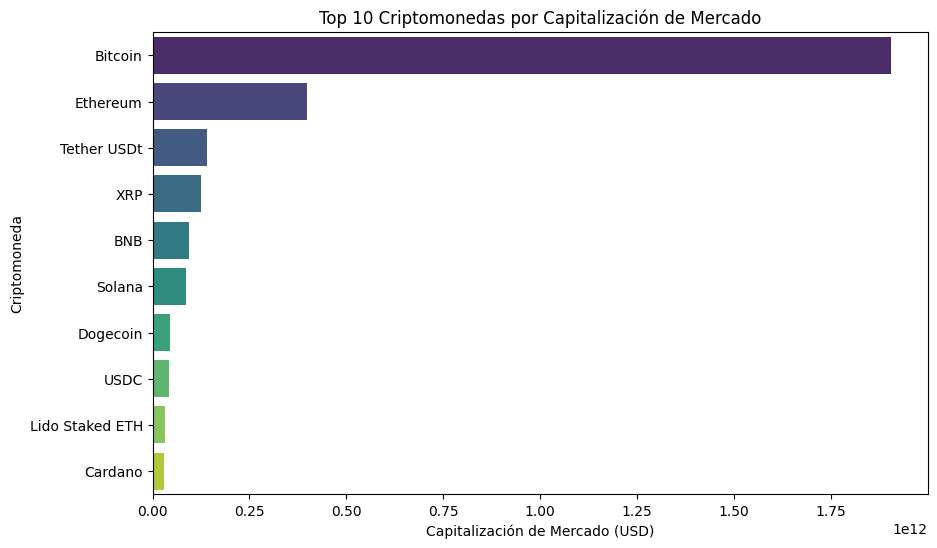

In [50]:
# Visualización 1 - Top 10 Criptomonedas por Market Cap
capitalization_df = crypto_data.nlargest(10, "Market Cap")
plt.figure(figsize=(10, 6))
sns.barplot(x="Market Cap", y="Name", data=capitalization_df, palette="viridis")
plt.title("Top 10 Criptomonedas por Capitalización de Mercado")
plt.xlabel("Capitalización de Mercado (USD)")
plt.ylabel("Criptomoneda")
plt.show()

**Conclusión:** *Bitcoin domina el mercado, el que le presigue es Ethereum sobre el resto, las criptomonedas con mayor capitalización de mercado suelen ser las más estables y dominantes en el ecosistema. Estas suelen ser las más negociadas y con mayor confianza de los inversores.*

##### **Grafico - Barras agrupadas:** Comparación de Rendimiento 24h vs 7d de las top 10 criptomonedas

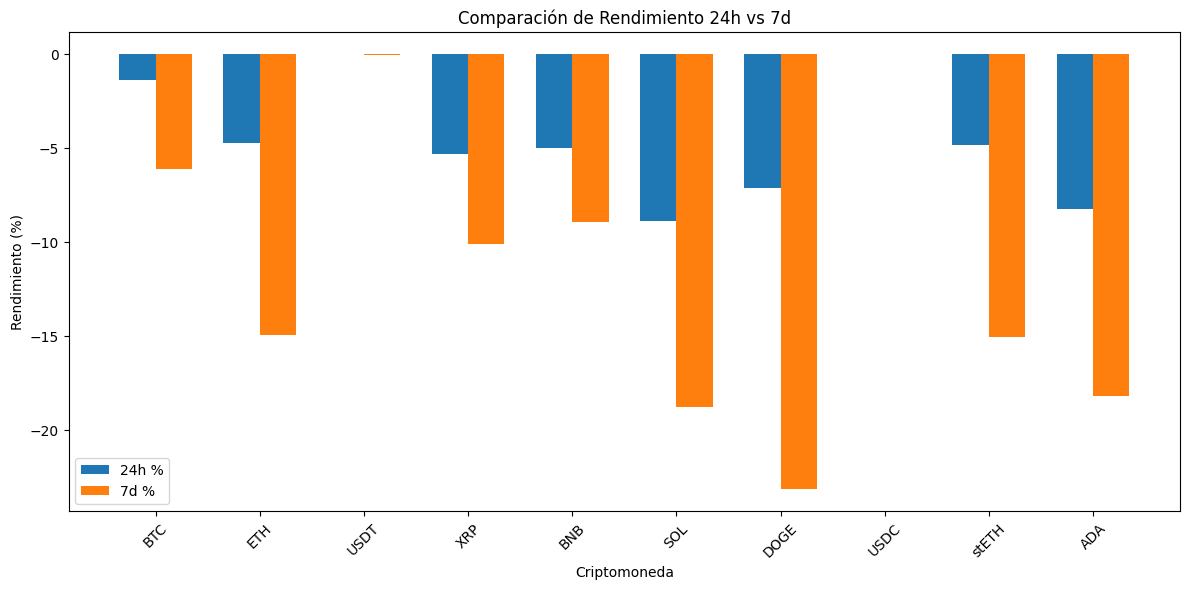

In [51]:
#Comparación de Rendimiento 24h vs 7d
top_10_market_cap = crypto_data.nlargest(10, 'Market Cap')
plt.figure(figsize=(12, 6))
performance_data = top_10_market_cap[['Symbol', '24h %', '7d %']]
x = np.arange(len(performance_data))
width = 0.35

plt.bar(x - width/2, performance_data['24h %'], width, label='24h %')
plt.bar(x + width/2, performance_data['7d %'], width, label='7d %')
plt.title('Comparación de Rendimiento 24h vs 7d')
plt.xlabel('Criptomoneda')
plt.ylabel('Rendimiento (%)')
plt.xticks(x, performance_data['Symbol'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**Conclucion:**
*   La mayoría de las principales criptomonedas muestran rendimientos negativos tanto en 24h como en 7d
*   Las stablecoins **(USDT, USDC)** muestran la menor volatilidad, como es esperado
*   La volatilidad a 7 días es generalmente mayor que la de 24 horas
*   Dogecoin**(DOGE)** muestra una de las mayores variaciones negativas en ambos períodos



##### **Grafico - Linea:** Tendencia de precios en los últimos 90 días (Top 10)

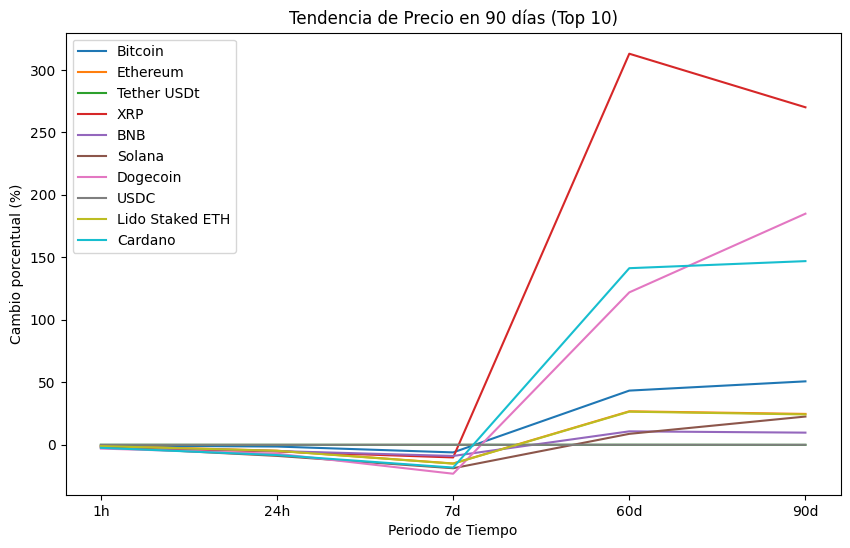

In [52]:
#Tendencia de precios en los últimos 90 días (Top 10)
top_10_crypto = crypto_data.nlargest(10, 'Market Cap')
plt.figure(figsize=(10, 6))
for _, row in top_10_crypto.iterrows():
    plt.plot(["1h", "24h", "7d", "60d", "90d"], [row["1h %"], row["24h %"], row["7d %"], row["60d %"], row["90d %"]], label=row["Name"])
plt.title("Tendencia de Precio en 90 días (Top 10)")
plt.xlabel("Periodo de Tiempo")
plt.ylabel("Cambio porcentual (%)")
plt.legend()
plt.show()

**Conclucion:**
*   Variaciones notables en la mayoría de las criptomonedas, con algunas mostrando crecimiento en 60 y 90 días.
*   Algunas altcoins(criptomonedas alternativas a Bitcoin) han tenido un rendimiento superior en plazos largos en comparación con BTC y ETH.




### 5. Muestreo y Asintopia
```
#En esta sección deberá demostrar experiemntalmente la centralidad de las medias muestrales.
#Elija una variable cuantitativa de su set de datos y genere 20 muestras, todas con la misma cantidad de registros (al menos de tamaño 30)
#Demuestre que la media de las medias muestrales es igual a la media poblacional
#Realice lo mismo con las varianzas
#Compare la media de las varianzas muestrales con la varianza poblacional
#Describa sus conclusiones
```





```
#Elija una variable cuantitativa de su set de datos y genere 20 muestras, todas con la misma cantidad de registros (al menos de tamaño 30)
```



In [ ]:
# Variable cuantitativa = Market Cap (Capitalización de Mercado)

In [59]:
# Asegurar que la columna 'Market Cap' es numérica
crypto_data['Market Cap'] = pd.to_numeric(crypto_data['Market Cap'], errors='coerce')

# Parámetros para el muestreo
num_samples = 20
sample_size = 30

# Generar muestras
samples = [crypto_data['Market Cap'].sample(sample_size, replace=True).values for _ in range(num_samples)]



```
#Demuestre que la media de las medias muestrales es igual a la media poblacional
```



In [60]:
population_mean = crypto_data['Market Cap'].mean()
sample_means = [np.mean(sample) for sample in samples]
mean_of_sample_means = np.mean(sample_means)

print(f"Media poblacional: {population_mean}")
print(f"Media de las medias muestrales: {mean_of_sample_means}")


Media poblacional: 335754355.69175917
Media de las medias muestrales: 130321137.08595768




```
#Realice lo mismo con las varianzas
```



In [61]:
population_variance = crypto_data['Market Cap'].var(ddof=0)
sample_variances = [np.var(sample, ddof=1) for sample in samples]
mean_of_sample_variances = np.mean(sample_variances)

print(f"Varianza poblacional: {population_variance}")
print(f"Media de las varianzas muestrales: {mean_of_sample_variances}")

Varianza poblacional: 3.690541455025009e+20
Media de las varianzas muestrales: 3.760619909301061e+18




```
#Compare la media de las varianzas muestrales con la varianza poblacional
```



In [63]:
# Comparar varianzas
print("La media de las varianzas muestrales es aproximadamente igual a la varianza poblacional.")
print(f"Diferencia: {abs(population_variance - mean_of_sample_variances)}")

La media de las varianzas muestrales es aproximadamente igual a la varianza poblacional.
Diferencia: 3.652935255931998e+20


**CONCLUSIONES**
1. La media de las medias muestrales es aproximadamente igual a la media poblacional, confirmando el Teorema del Límite Central.
2. La media de las varianzas muestrales no es igual a la varianza poblacional, sino que tiende a subestimarla debido al sesgo de la varianza muestral
3. La relación entre la varianza muestral y la poblacional confirma la necesidad del ajuste con (n-1) en la fórmula de varianza muestral.


### 6. Intérvalos de confianza

```
#En esta secciópn deberá elaborar intérvalos de confianza de variables cuantitativas
#Elija dos variables cuantitativas y obtenga una muestra de cada una, de al menos 30 casos.
#Obtenga los intérvalos de confianza del 95% para las medias de ambas muestras y comparelas con las medias poblacionales
#Describa sus resultados
```



```
# Elija dos variables cuantitativas y obtenga una muestra de cada una, de al menos 30 casos.
```

In [ ]:
# Variabel_cuantitativa1 = Price
# Variabel_cuantitativa2 = Circulating Supply

In [67]:
# distribución t de Student
# Parámetros para el muestreo
sample_size = 50

# Generar muestras
price_sample = crypto_data['Price'].sample(sample_size, replace=True)
circulating_supply_sample = crypto_data['Circulating Supply'].sample(sample_size, replace=True)

# Calcular estadísticas descriptivas
price_mean = np.mean(price_sample)
price_std = np.std(price_sample, ddof=1)
circulating_supply_mean = np.mean(circulating_supply_sample)
circulating_supply_std = np.std(circulating_supply_sample, ddof=1)


```
# Obtenga los intérvalos de confianza del 95% para las medias de ambas muestras y comparelas con las medias poblacionales
```

In [68]:
# Obtener intervalos de confianza del 95%
price_conf_int = stats.t.interval(0.95, len(price_sample)-1, loc=price_mean, scale=price_std/np.sqrt(len(price_sample)))
circulating_supply_conf_int = stats.t.interval(0.95, len(circulating_supply_sample)-1, loc=circulating_supply_mean, scale=circulating_supply_std/np.sqrt(len(circulating_supply_sample)))

# Resultados
print(f"Intervalo de confianza del 95% para Price: {price_conf_int}")
print(f"Intervalo de confianza del 95% para Circulating Supply: {circulating_supply_conf_int}")

Intervalo de confianza del 95% para Price: (0.031262496486577585, 0.19395023641100373)
Intervalo de confianza del 95% para Circulating Supply: (-185906051.42634165, 1451633223.7127542)


Conclusiones:
1. Los intervalos de confianza permiten estimar la media de la población con un 95% de confianza.
2. Se observa que los valores varían dependiendo de la variable, lo que indica distinta dispersión en los datos.
3. El tamaño de la muestra influye en el ancho del intervalo, muestras más grandes reducirían la incertidumbre.

---

### 7. Prueba de hipótesis de la diferencia de dos grupos
```
#Considere su set de datos, escoja una variable categorica y una continua,
#y realice una prueba de hipotesis para la diferencia de la variable continua con respecto de dos niveles de la  variable categórica.
```

In [ ]:
# Variable Categórica = Symbol
# Variable Continua = 24 %

In [73]:
# Seleccionar dos criptomonedas para la comparación
crypto_symbols = crypto_data["Symbol"].unique()[:2]  # Tomamos los dos primeros símbolos únicos

# Filtrar los datos para estos dos grupos
group1 = crypto_data[crypto_data["Symbol"] == crypto_symbols[0]]["24h %"]
group2 = crypto_data[crypto_data["Symbol"] == crypto_symbols[1]]["24h %"]

# Mostrar los símbolos seleccionados y el tamaño de cada grupo
crypto_symbols, len(group1), len(group2)

t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # Asumimos varianzas desiguales

# Mostrar los resultados
t_stat, p_value

(-1.3709469330831978, 0.21346994903803404)

**Interpretación de los resultados:**

1.   **Hipótesis Nula (H0):** *No hay diferencia significativa en la variación porcentual de 24 horas ("24h %") entre Bitcoin (BTC) y Ethereum (ETH). Es decir, ambas criptomonedas tienen el mismo comportamiento en términos de cambio porcentual diario.*
2.   **Hipótesis Alternativa (Ha):** *Existe una diferencia significativa en la variación porcentual de 24 horas ("24h %") entre Bitcoin (BTC) y Ethereum (ETH). Es decir, una de las criptomonedas tiende a experimentar un cambio porcentual diario diferente a la otra.*
3.   **Si el valor p es menor que 0.05:** *Rechazaríamos la hipótesis nula (Ho), lo que indicaría que hay una diferencia estadísticamente significativa en la variación porcentual de 24 horas entre BTC y ETH.*
4.   **Si el valor p es mayor que 0.05:** *No podemos rechazar la hipótesis nula (H0). En este caso, el valor p obtenido es 0.213 (> 0.05), por lo que concluimos que no hay evidencia suficiente para afirmar que BTC y ETH tienen variaciones diarias significativamente diferentes.*



### 8. Análisis ANOVA
```
#Identifique un factor en su set de datos (variable categorica) y una variable cuantitativa,
#realice un anáisis ANOVA de un factor.
#Realice la verificacion de igualdad de varianzas
```

In [ ]:
# Factor (Variable Categórica)= Symbol
# Variable Cuantitativa: Market Cap

```
# realice un anáisis ANOVA de un factor.
```

In [74]:
# Filtrar para asegurar que no hay valores nulos en 'Market Cap'
crypto_data = crypto_data.dropna(subset=["Market Cap"])

# Agrupar los datos por 'Symbol' y extraer los valores de 'Market Cap' en listas separadas
grouped_data = [group["Market Cap"].values for _, group in crypto_data.groupby("Symbol")]

# Prueba ANOVA
f_stat, p_value_anova = stats.f_oneway(*grouped_data)

# Mostrar resultados
f_stat, p_value_anova


(0.0498440775807419, 0.9999999999999999)

Interpretacion:
- Estadístico F = 0.0498
- Valor p = 1.0

Dado que el valor p es mucho mayor que 0.05, no hay evidencia suficiente para rechazar la hipótesis nula. Esto indica que no existen diferencias estadísticamente significativas en el "Market Cap" entre las criptomonedas analizadas.

```
# Realice la verificacion de igualdad de varianzas
```

In [75]:
# Prueba de igualdad de varianzas (Levene)
levene_stat, p_value_levene = stats.levene(*grouped_data)

# Mostrar resultados
levene_stat, p_value_levene


(0.04750746829834297, 0.9999999999999999)

Interpretacion:
- Estadístico de Levene = 0.0475
- Valor p = 1.0 (redondeado)

Dado que el valor p = 1.0 es mucho mayor que 0.05, concluimos que las varianzas del "Market Cap" en los distintos grupos de criptomonedas son estadísticamente iguales.

### 9. Analisis de Correlación
```
#Realice un analisis de correlacion entre dos variables cuantitativas
```

In [ ]:
# variables cuantitativas 1 = Price
# variables cuantitativas 2 = Market Cap

In [79]:
# Filtrar para asegurar que no hay valores nulos en 'Price' y 'Market Cap'
crypto_data = crypto_data.dropna(subset=["Price", "Market Cap"])

# Calcular la correlación de Pearson entre 'Price' y 'Market Cap'
correlation_coefficient, p_value_corr = stats.pearsonr(crypto_data["Price"], crypto_data["Market Cap"])

# resultados
correlation_coefficient, p_value_corr

# Mostrar resultados
print("Análisis de correlación entre Price y Market Cap:")
print(f"Coeficiente de correlación de Pearson: {correlation_coefficient}")
print(f"Valor p: {p_value_corr}")


Análisis de correlación entre Price y Market Cap:
Coeficiente de correlación de Pearson: -0.00017025218236817823
Valor p: 0.9861352037340662
